In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [17]:
RELEVANT_POLITICIANS = ["meloni.json", "salvini.json", "berlusconi.json", "calenda.json", "letta.json", "conte.json", "bonino.json", "renzi.json"]

def read_data(input_directory: str):
    input_data, politicians_data = dict(), dict()

    for filename in os.listdir(input_directory):
        if filename not in RELEVANT_POLITICIANS: continue
        if filename.endswith("json"):
            politician_name = filename.split(".")[0]

            file_location = os.path.join(input_directory, filename)
            data = json.load(open(file_location, "r"))
            
            input_data[politician_name] = data["tweets"]
            politicians_data[politician_name] = data["user_data"]
            
        else: 
            raise Exception(f"Input file {filename} has a non supported format.")
    return input_data, politicians_data

In [18]:
tweets_data, politicians_data = read_data("../data")

In [35]:
def histogram(ticks, values, title=""):
    figure(figsize=(25, 10), dpi=100)
    x = np.arange(len(ticks))
    plt.bar(x, height=values)
    plt.xticks(x, ticks, fontsize=20)
    plt.yticks(fontsize=15)
    plt.title(title, fontdict={"fontsize": 20})
    plt.show()

In [36]:
politicians = list()
followers_count = list()
following_count = list()
tweet_count = list()
listed_count = list()
created_at = list()

for politician in politicians_data.keys():
    politicians.append(politician)

    public_metrics = politicians_data[politician]["public_metrics"]
    followers_count.append(public_metrics["followers_count"])
    following_count.append(public_metrics["following_count"])
    tweet_count.append(public_metrics["tweet_count"])
    listed_count.append(public_metrics["listed_count"])
    
    created_at.append(politicians_data[politician]["created_at"])


In [37]:
#pd.DataFrame([politicians, created_at]).T

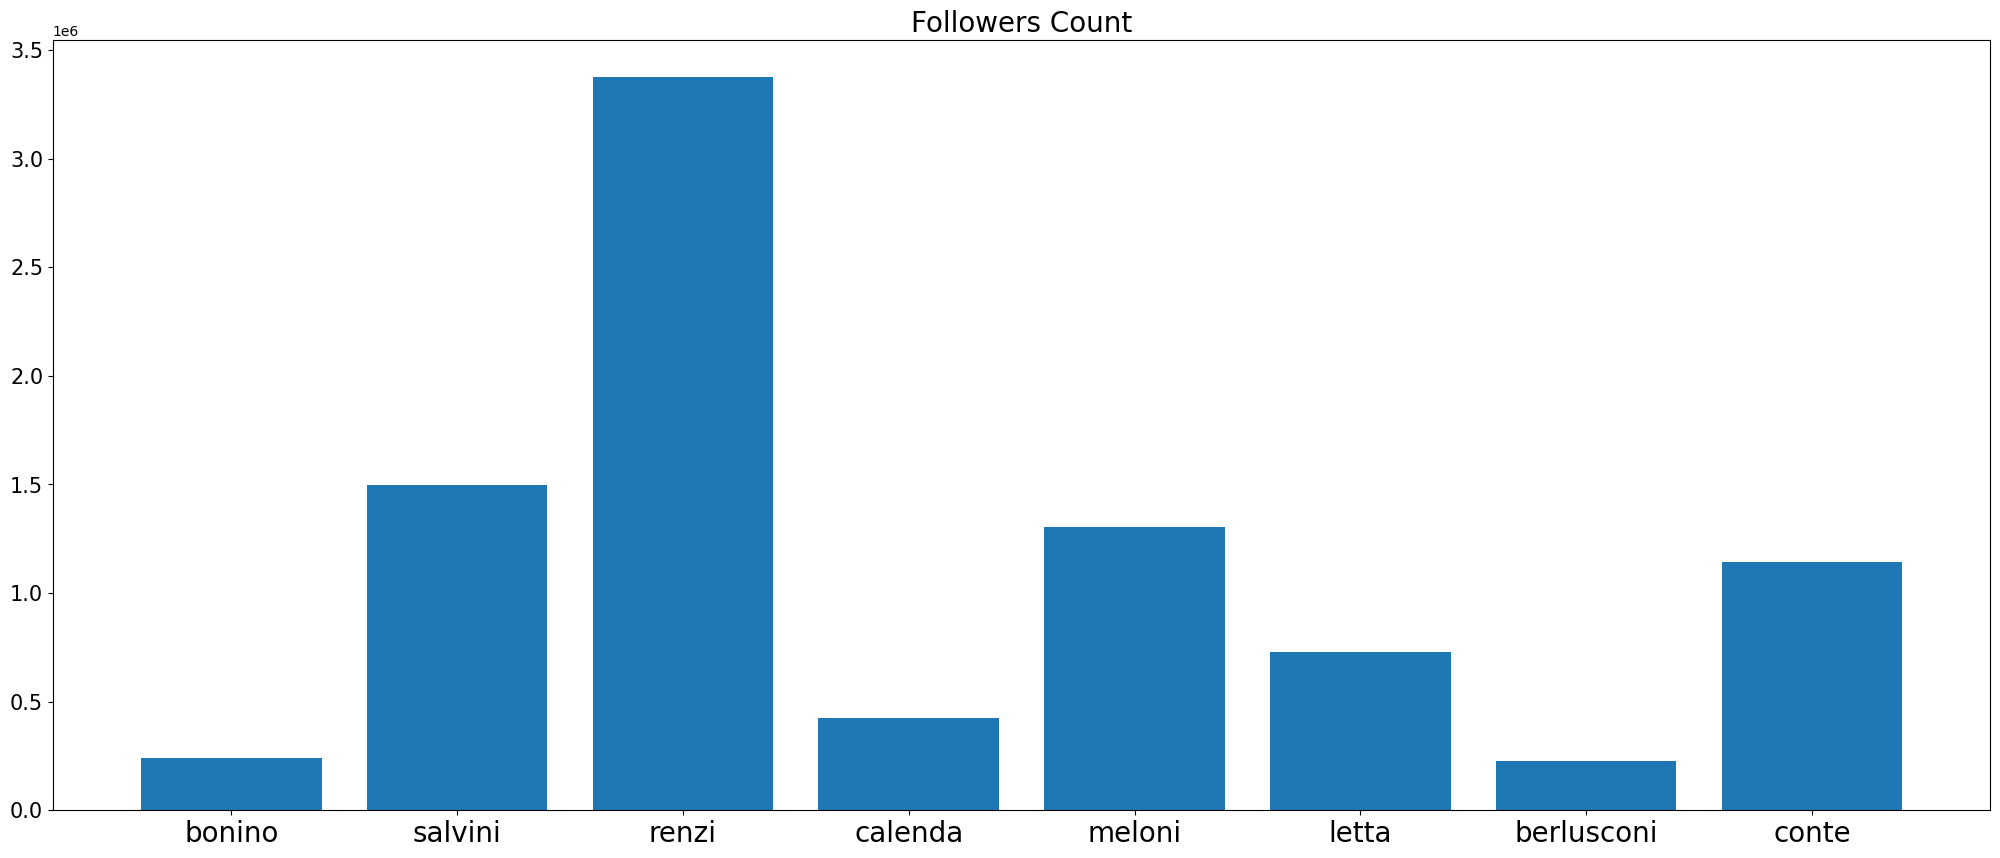

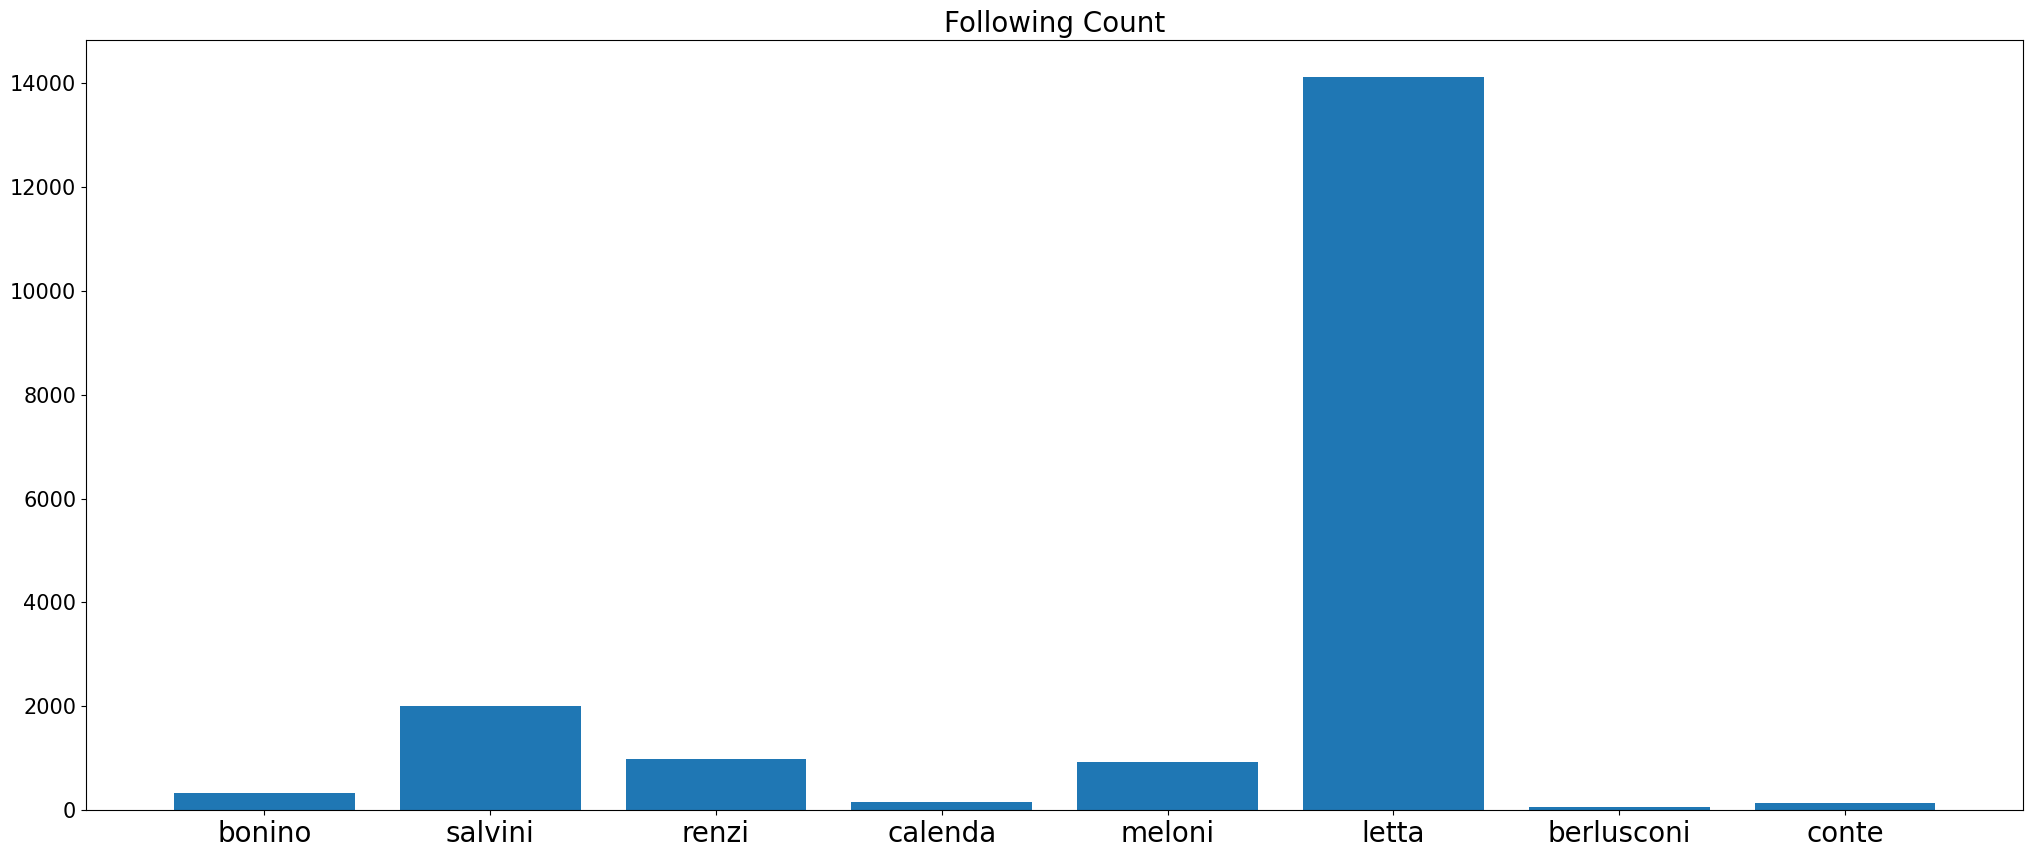

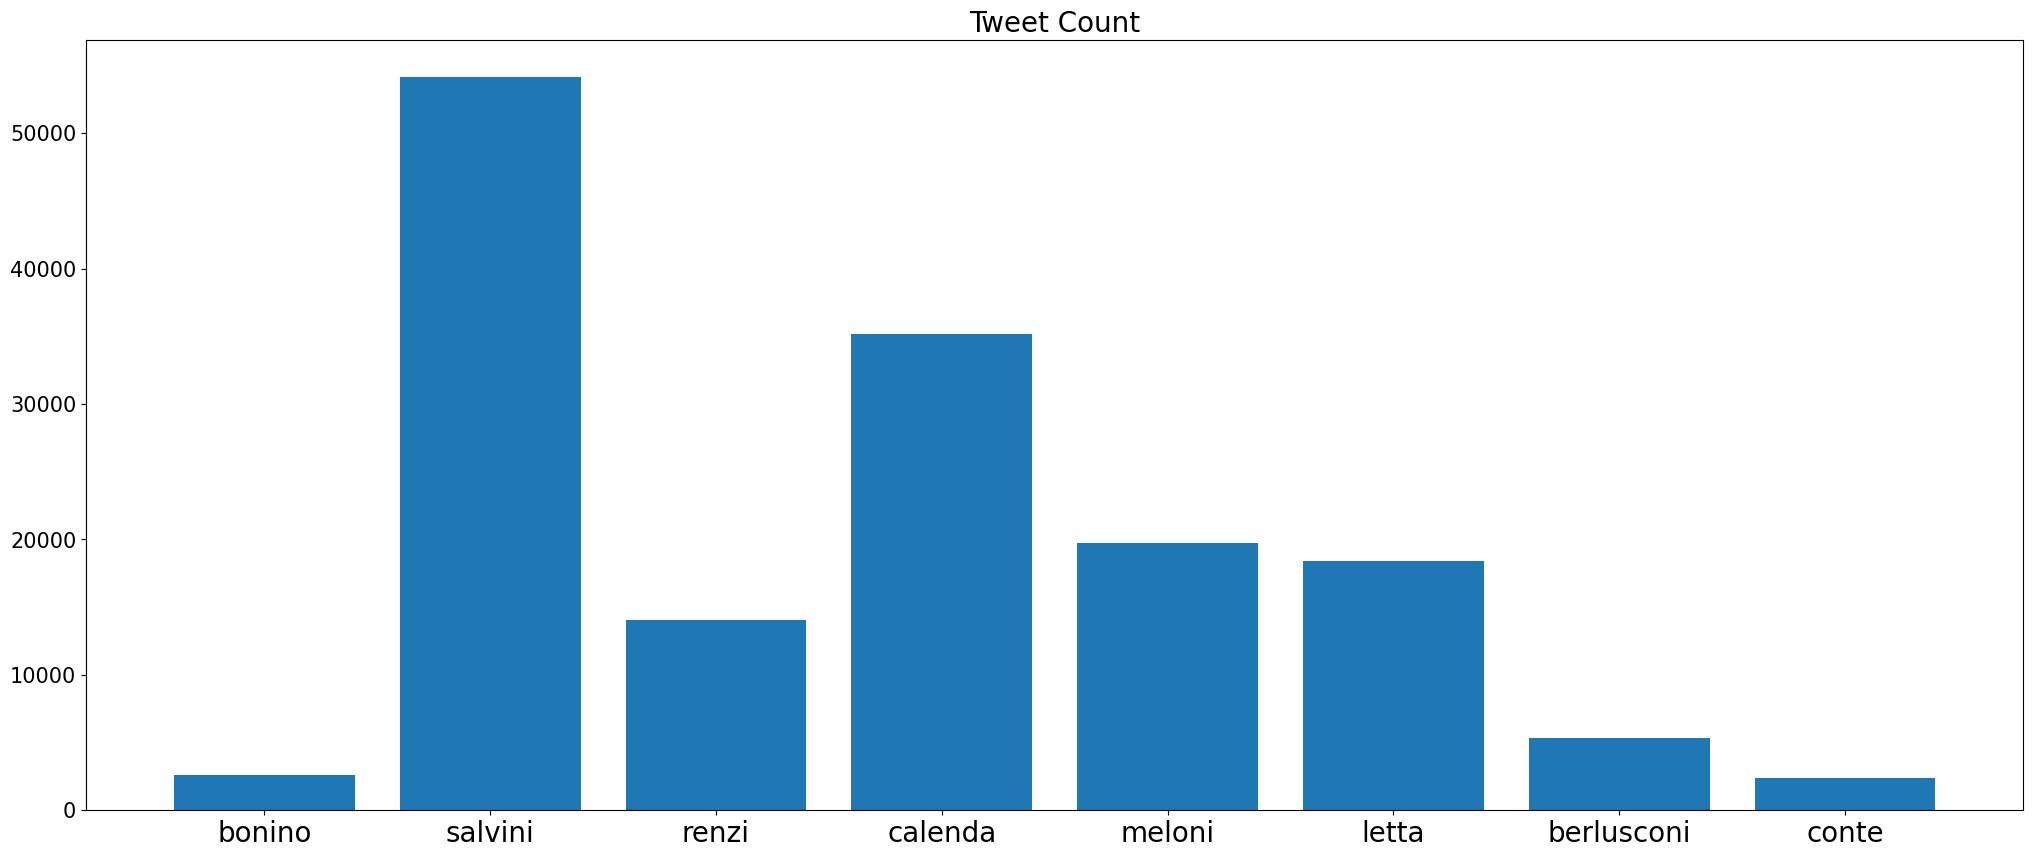

In [38]:
histogram(politicians, followers_count, "Followers Count")
histogram(politicians, following_count, "Following Count")
histogram(politicians, tweet_count, "Tweet Count")
#histogram(politicians, listed_count, "Listed Count")

In [39]:
from datetime import datetime

# TODO create a pipeline funciton to use in pandas distributed-wise
def date_filter(tweet: dict, start_date = datetime(2022,7,22), end_date = datetime(2022,9,25)):
    created_at = datetime.strptime(tweet['created_at'], "%Y-%m-%dT%H:%M:%S.%fZ")
    return created_at >= start_date and created_at < end_date

def is_retweet(tweet: dict):
    return tweet["text"].startswith("RT @")

def preclean_tweet(tweet: dict):
    if date_filter(tweet) and not is_retweet(tweet):
        return tweet
    else:
        return ""

POLITICIANS = list(tweets_data.keys())
filtered_data = {politician: list(filter(None, [preclean_tweet(tweet) for tweet in tweets_data[politician]])) for politician in POLITICIANS}

In [40]:
retweet_count = dict()
reply_count = dict()
like_count = dict()
quote_count = dict()
created_at = dict()

DATETIME_FORMAT = '%Y-%m-%dT%H:%M:%S.%fZ'

for politician in politicians:
    filtered_data[politician]

    retweet_count[politician] = [tweet["public_metrics"]["retweet_count"] for tweet in filtered_data[politician]]
    reply_count[politician] = [tweet["public_metrics"]["reply_count"] for tweet in filtered_data[politician]]
    like_count[politician] = [tweet["public_metrics"]["like_count"] for tweet in filtered_data[politician]]
    quote_count[politician] = [tweet["public_metrics"]["quote_count"] for tweet in filtered_data[politician]]
    created_at[politician] = [datetime.strptime(tweet["created_at"], DATETIME_FORMAT).date() for tweet in filtered_data[politician]]

In [43]:
def multi_boxplot(dictionary, title=""):
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot(dictionary.values())
    ax.set_xticklabels(dictionary.keys())
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=15)
    plt.title(title, fontdict={"fontsize": 20})
    plt.show()


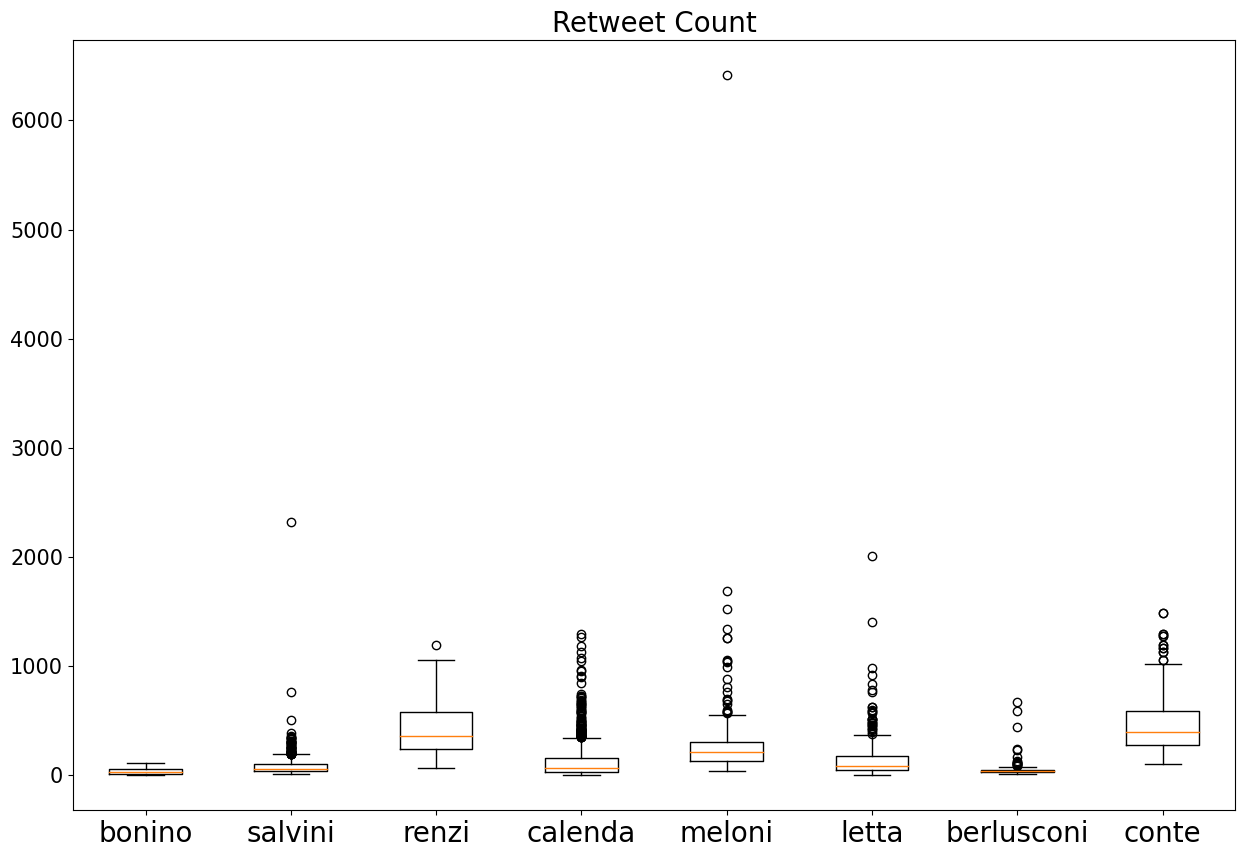

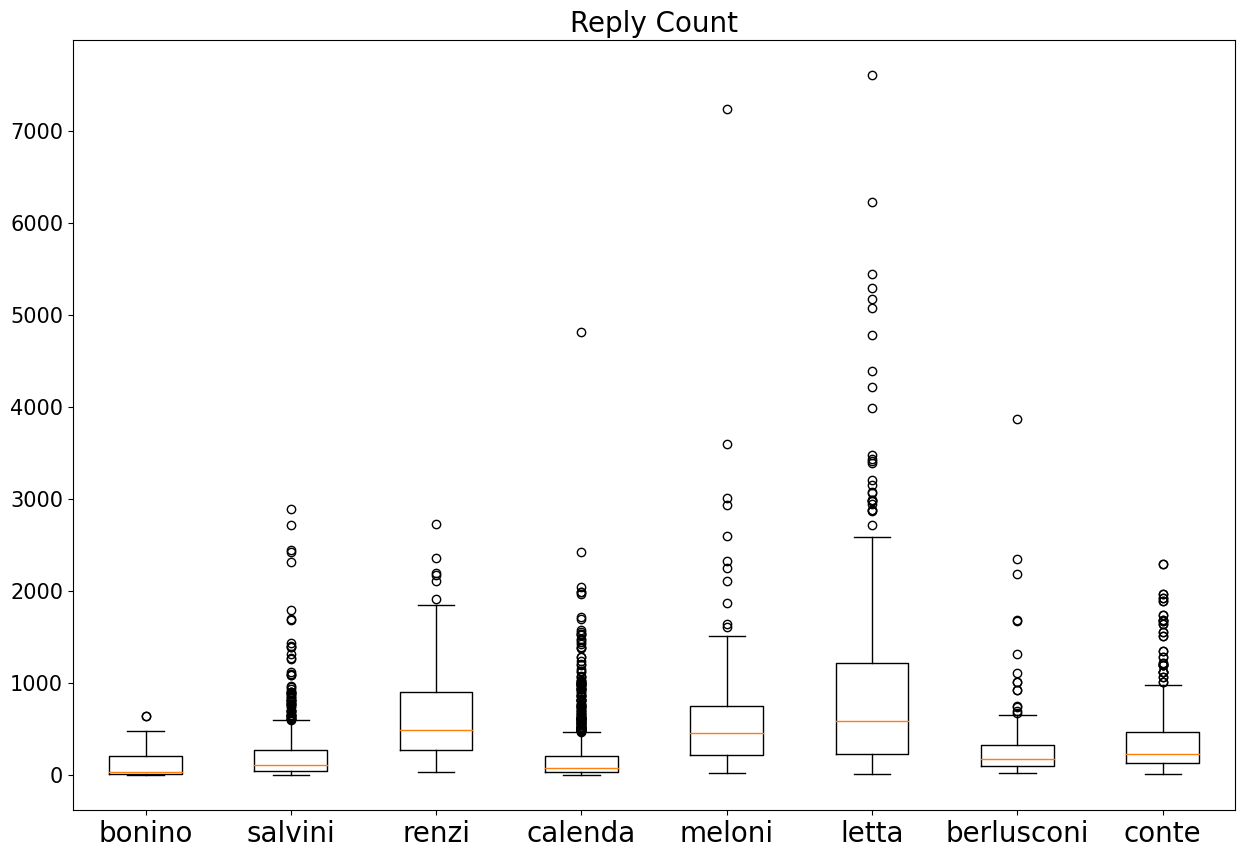

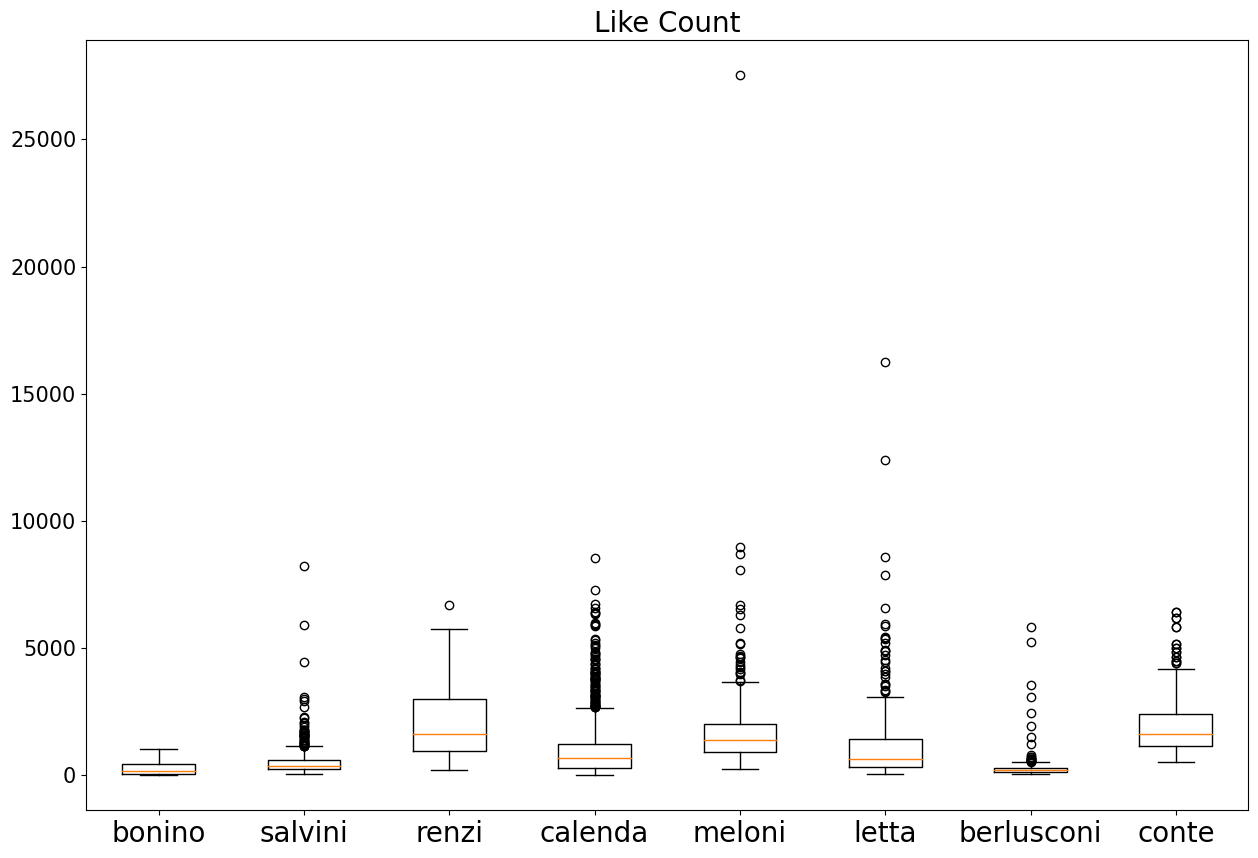

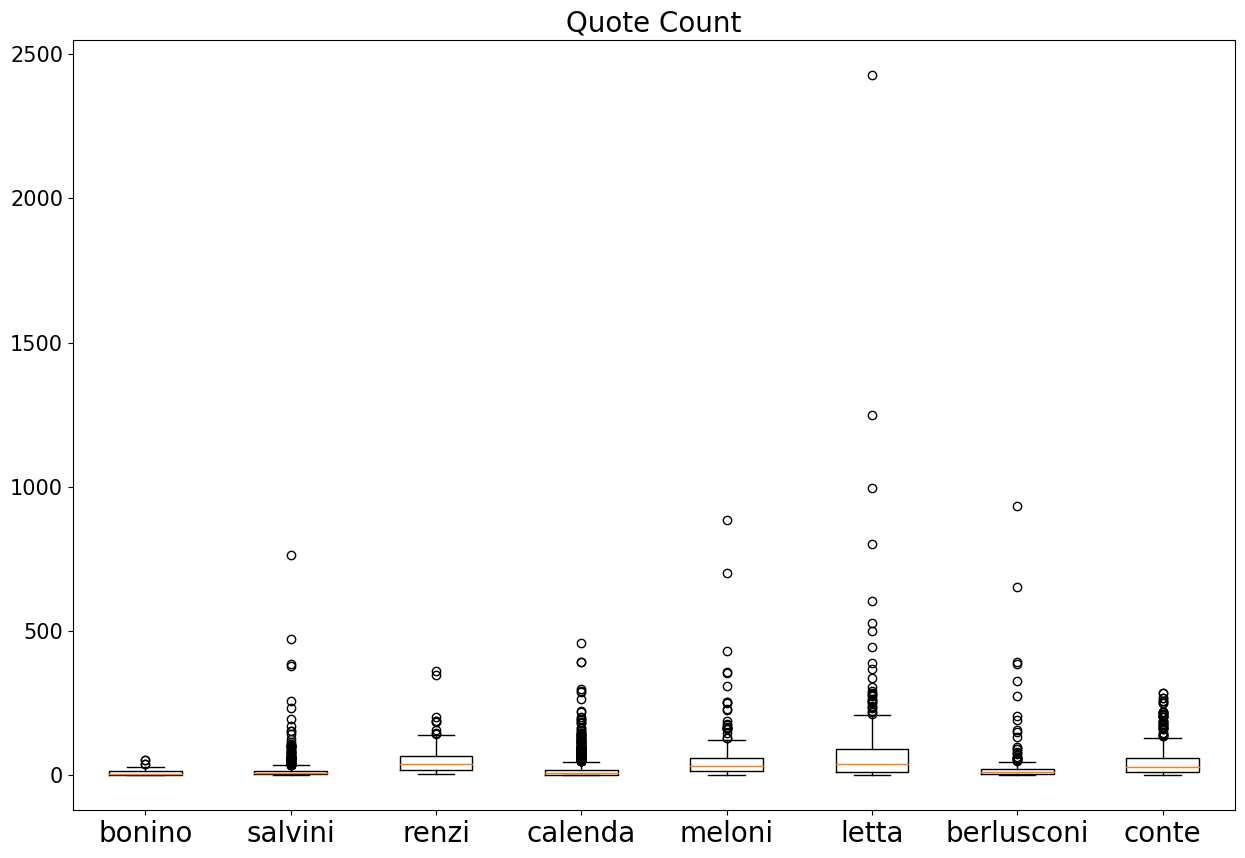

In [44]:
multi_boxplot(retweet_count, "Retweet Count")
multi_boxplot(reply_count, "Reply Count")
multi_boxplot(like_count, "Like Count")
multi_boxplot(quote_count, "Quote Count")

In [45]:
time_series = dict()

for politician in politicians:

    time_series[politician] = {date: created_at[politician].count(date) for date in set(created_at[politician])}

In [48]:
def tweets_time_series(time_series_dicts, title=""):
    
    fig, ax = plt.subplots(figsize=(25, 10))

    for politician in time_series_dicts.keys():
        data = sorted(list(time_series_dicts[politician].items()), key=lambda x: x[0])
        x = np.array([i[0] for i in data])
        y = [i[1] for i in data]
        plt.plot(x,y, label = politician)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=15)
    plt.title(title, fontdict={"fontsize": 20})
    plt.legend()

    plt.show()

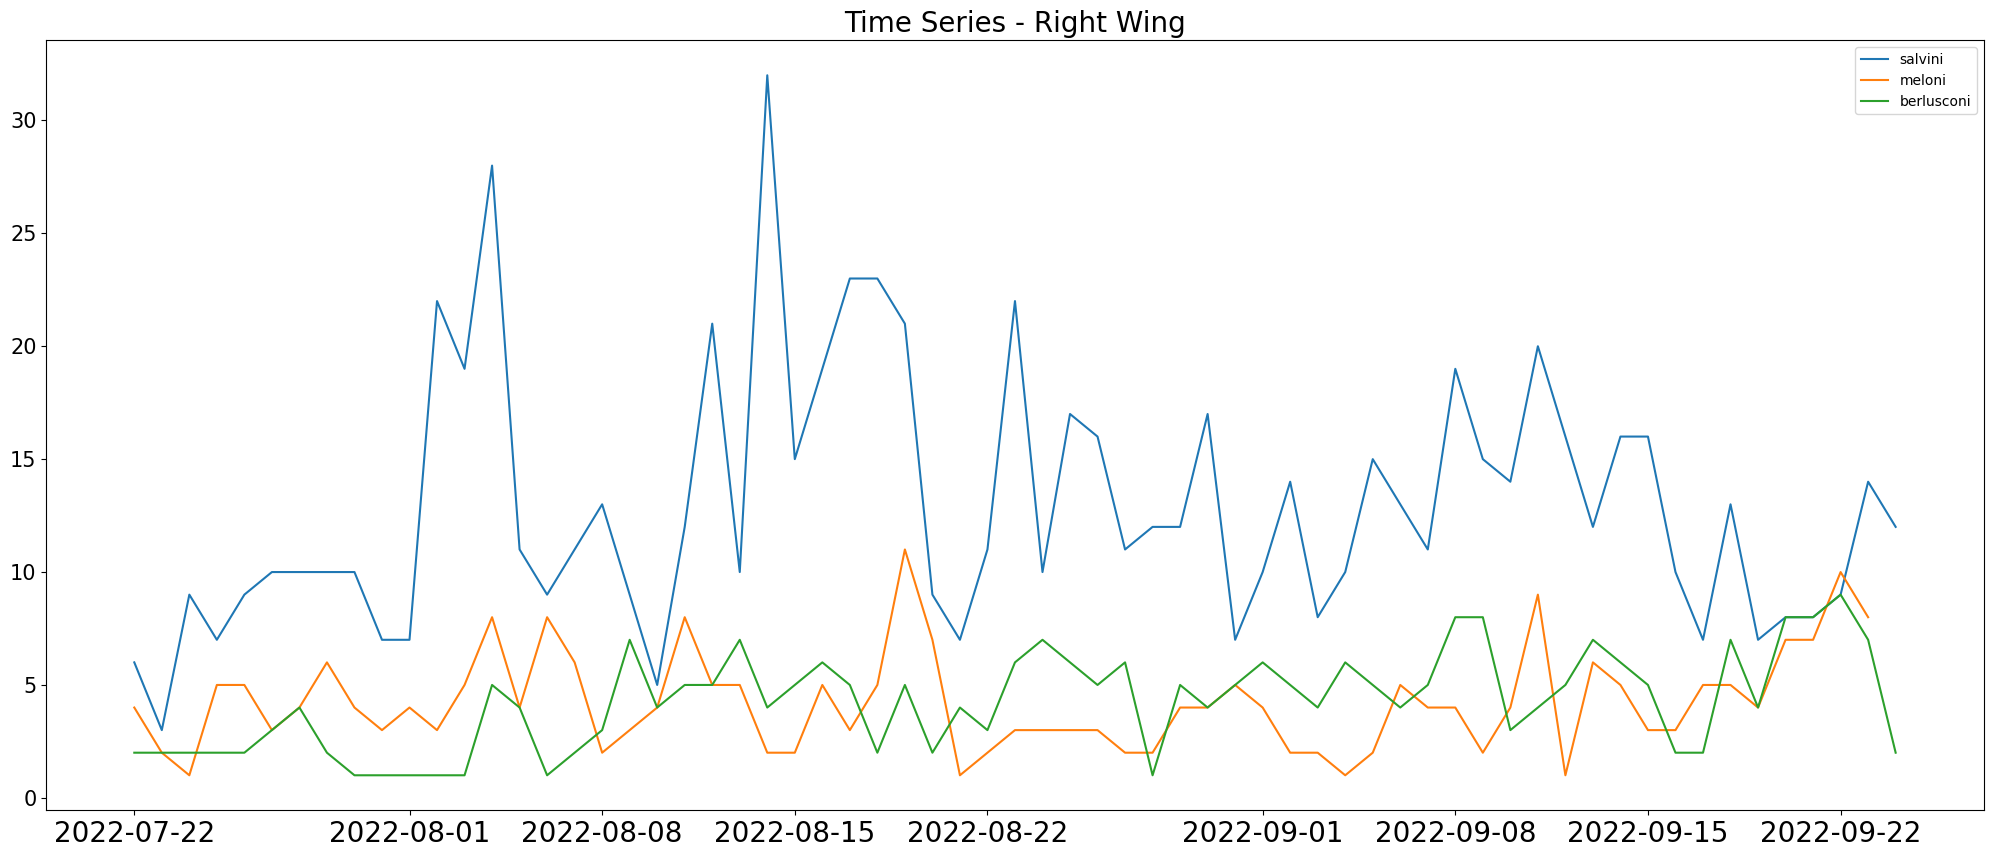

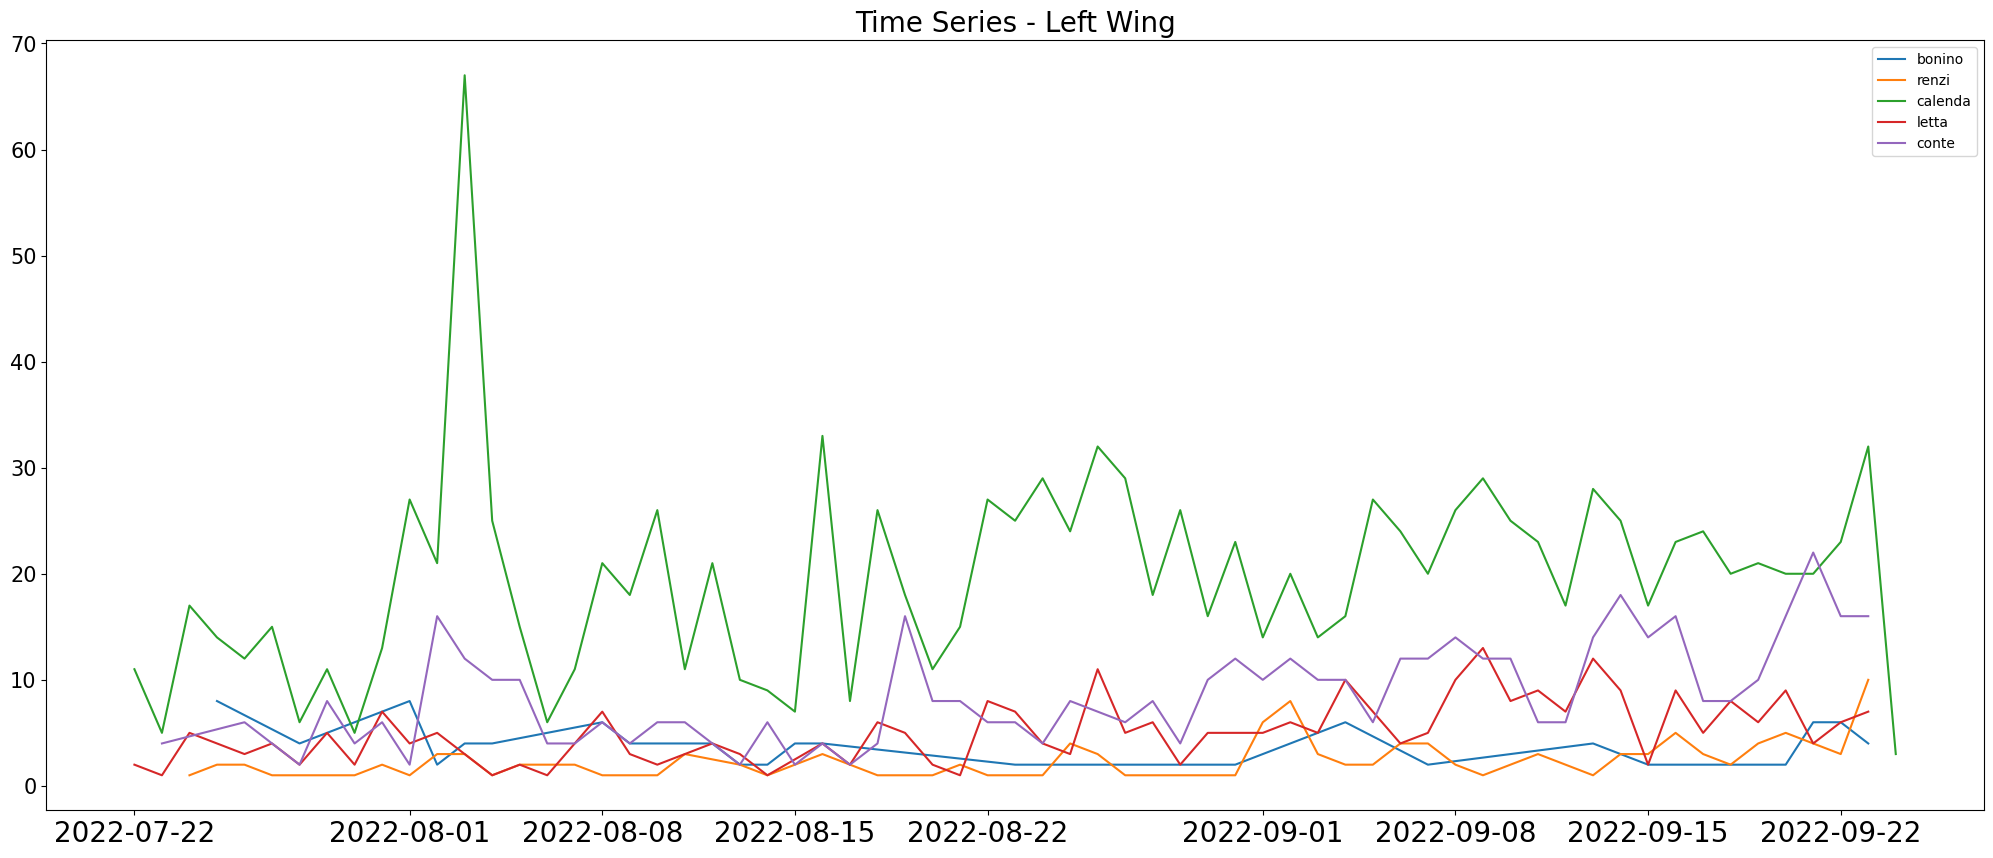

In [49]:
RIGHT_WING_POLITICIANS = ['salvini', 'meloni', 'berlusconi']
LEFT_WING_POLITICIANS = ['bonino','renzi', 'calenda', 'letta', 'conte']

tweets_time_series({ key: time_series[key] for key in RIGHT_WING_POLITICIANS }, "Time Series - Right Wing")
tweets_time_series({ key: time_series[key] for key in LEFT_WING_POLITICIANS }, "Time Series - Left Wing")